In [1]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pickle

In [2]:
# Get all the files from 2020
files = glob.glob(os.path.join('D:', 'SafeGraph_Data', '2020', '**', '**', '*.gz'))
files

['D:SafeGraph_Data\\2020\\01\\01\\2020-01-01-social-distancing.csv.gz',
 'D:SafeGraph_Data\\2020\\01\\02\\2020-01-02-social-distancing.csv.gz',
 'D:SafeGraph_Data\\2020\\01\\03\\2020-01-03-social-distancing.csv.gz',
 'D:SafeGraph_Data\\2020\\01\\04\\2020-01-04-social-distancing.csv.gz',
 'D:SafeGraph_Data\\2020\\01\\05\\2020-01-05-social-distancing.csv.gz',
 'D:SafeGraph_Data\\2020\\01\\06\\2020-01-06-social-distancing.csv.gz',
 'D:SafeGraph_Data\\2020\\01\\07\\2020-01-07-social-distancing.csv.gz',
 'D:SafeGraph_Data\\2020\\01\\08\\2020-01-08-social-distancing.csv.gz',
 'D:SafeGraph_Data\\2020\\01\\09\\2020-01-09-social-distancing.csv.gz',
 'D:SafeGraph_Data\\2020\\01\\10\\2020-01-10-social-distancing.csv.gz',
 'D:SafeGraph_Data\\2020\\01\\11\\2020-01-11-social-distancing.csv.gz',
 'D:SafeGraph_Data\\2020\\01\\12\\2020-01-12-social-distancing.csv.gz',
 'D:SafeGraph_Data\\2020\\01\\13\\2020-01-13-social-distancing.csv.gz',
 'D:SafeGraph_Data\\2020\\01\\14\\2020-01-14-social-distancing.c

In [4]:
df_original = []
# Adds every csv.gz file of 2020 as a panda dataframe to list df_original
for file in files:
    df = pd.read_csv(file, compression='gzip', usecols=['origin_census_block_group', 
                                                         'device_count', 'completely_home_device_count',
                                                        'part_time_work_behavior_devices', 'full_time_work_behavior_devices'])
    df['origin_census_block_group'] = df['origin_census_block_group'].astype(str)
    # Filters for Honolulu county
    temp = df['origin_census_block_group'].str.contains('^15003')
    df_original.append(df[temp])


In [5]:
print(df_original[0].head())
print(len(df_original))

     origin_census_block_group  device_count  completely_home_device_count  \
78                150030075061            41                            16   
1542              150030097013           182                            59   
1778              150030009032            47                            13   
2242              150030034032            36                            16   
2484              150030077022           109                            32   

      part_time_work_behavior_devices  full_time_work_behavior_devices  
78                                  2                                1  
1542                                3                                1  
1778                                1                                1  
2242                                4                                1  
2484                                2                                1  
307


In [6]:
# Save the extracted csvs as a pickle
pickle_out = open("2020.pickle", "wb")
pickle.dump(df_original, pickle_out)
pickle_out.close()

In [3]:
# Load the pickle with the extracted csvs
pickle_in = open("2020.pickle", "rb")
df_original = pickle.load(pickle_in)
print(df_original[0].head())
print(len(df_original))

     origin_census_block_group  device_count  completely_home_device_count  \
78                150030075061            41                            16   
1542              150030097013           182                            59   
1778              150030009032            47                            13   
2242              150030034032            36                            16   
2484              150030077022           109                            32   

      part_time_work_behavior_devices  full_time_work_behavior_devices  
78                                  2                                1  
1542                                3                                1  
1778                                1                                1  
2242                                4                                1  
2484                                2                                1  
307


In [4]:
# Get percent of people who stayed home every day in 2020
percentage = []
for data in df_original:
    df = data
    df.loc['Totals'] = 0
    df.loc['Totals'] = df.sum(skipna = True)
    percentage.append(df.at['Totals', 'completely_home_device_count'] / df.at['Totals', 'device_count'])

In [5]:
# Make list for all days of 2020 up to 11/02 (last day data was updated)
dates = pd.date_range(start=datetime.datetime(2020, 1, 1), end=datetime.datetime(2020, 11, 2), freq = 'D')

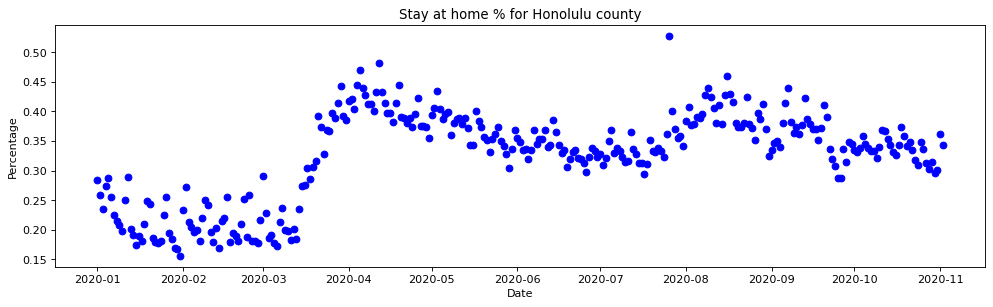

In [14]:
# Makes plot wider so you can better see x axis.
plt.figure(num=None, figsize=(15, 4), dpi=80, facecolor='w', edgecolor='k')
# Shows the percent of people who stayed home in 2020
plt.title('Stay at home % for Honolulu county')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.plot(dates, percentage, 'bo')
plt.show()

In [7]:
# Get percent of people who worked part time every day in 2020
percentagePart = []
for data in df_original:
    df = data
    df.loc['Totals'] = 0
    df.loc['Totals'] = df.sum(skipna = True)
    percentagePart.append(df.at['Totals', 'part_time_work_behavior_devices'] / df.at['Totals', 'device_count'])

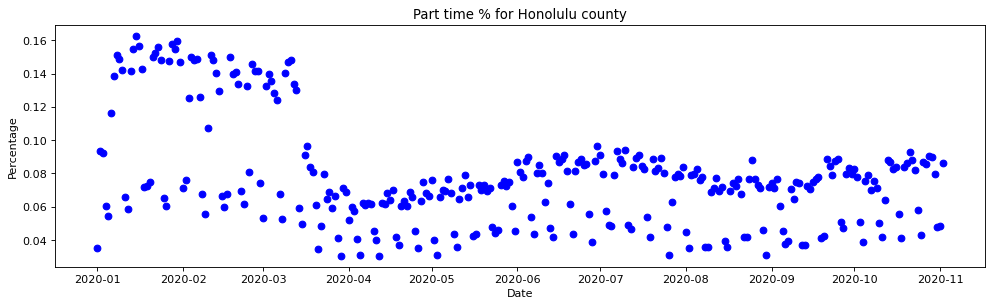

In [8]:
# Makes plot wider so you can better see x axis.
plt.figure(num=None, figsize=(15, 4), dpi=80, facecolor='w', edgecolor='k')

# Shows the percent of people who worked part time in 2020
# The sudden drops are due to weekends

plt.title('Part time % for Honolulu county')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.plot(dates, percentagePart, 'bo')
plt.show()

In [9]:
# Get percent of people who worked full time every day in 2020
percentageFull = []
for data in df_original:
    df = data
    df.loc['Totals'] = 0
    df.loc['Totals'] = df.sum(skipna = True)
    percentageFull.append(df.at['Totals', 'full_time_work_behavior_devices'] / df.at['Totals', 'device_count'])

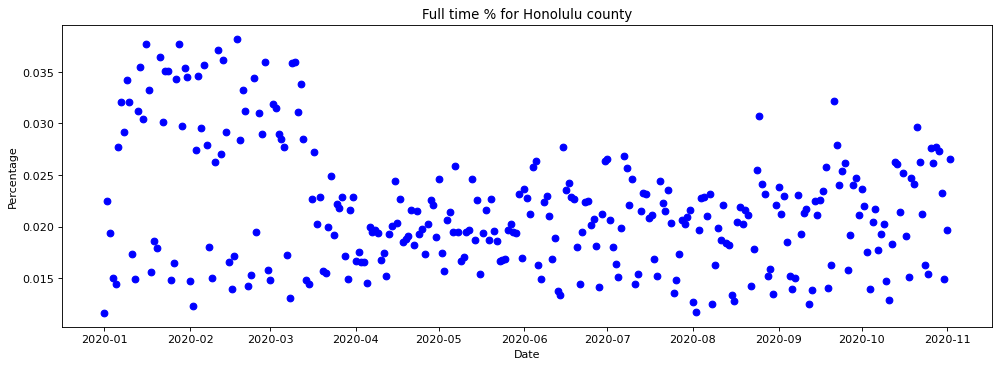

In [10]:
plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

# Shows the percent of people who worked full time in 2020
# The sudden drops are due to weekends

plt.title('Full time % for Honolulu county')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.plot(dates, percentageFull, 'bo')
plt.show()

In [11]:
test_full = []
for data in df_original:
    df = data
    df.loc['Totals'] = 0
    df.loc['Totals'] = df.sum(skipna = True)
    test_full.append(df.at['Totals', 'full_time_work_behavior_devices'])

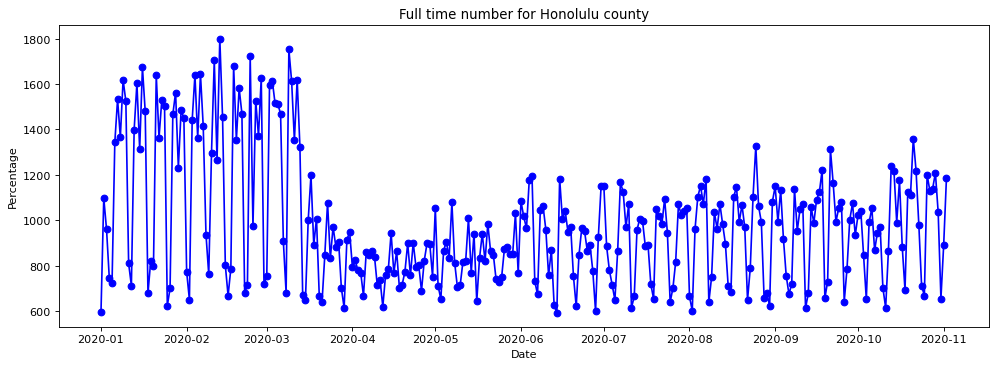

In [12]:
# Line graph testing w/ raw numbers

plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

# Shows the number of people who worked full time in 2020
# The sudden drops are due to weekends


plt.title('Full time number for Honolulu county')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.plot(dates, test_full, 'bo-')
plt.show()